### Simualting BlackJack

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from game import Game
import time

Elapsed time: 169 seconds


Text(0,0.5,'Money')

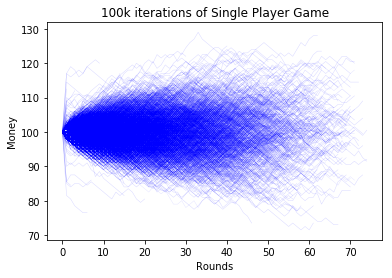

In [2]:
start = time.time()
game = Game(1, 100, 1, 8, "warning")
m = []
last_m = []
money = [100]
round_ = 0
# figure = plt.figure(figsize=(12, 15))
while round_ < int(1e5):
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        round_ += 1
        if game.play_round():
            money.append(game.players[0].money)
        else:
            plt.plot(money, 'b-', alpha=0.15, linewidth=0.5)
            m.append(money)
            last_m.append(money[-1])
            game = Game(1, 100, 1, 8, "warning")
            money = [100]
    else:
        plt.plot(money, 'b-', alpha=0.10, linewidth=0.5)
#         time.sleep(1)
        game = Game(1, game.players[0].money, 1, 8, "warning")
        money = [100]
end = time.time()
print("Elapsed time: {} seconds".format(int(end-start)))
plt.title("100k iterations of Single Player Game")
plt.xlabel("Rounds")
plt.ylabel("Money")

Mean of the experiments: 99.87
Variance of the experiments: 34.13


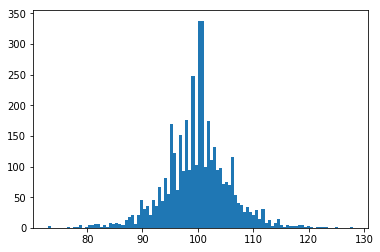

In [5]:
last_m = np.array(last_m)
print("Mean of the experiments: {:.2f}".format(last_m.mean()))
print("Variance of the experiments: {:.2f}".format(last_m.var()))
fig = plt.hist(last_m, bins=100)

Elapsed time in seconds: 2


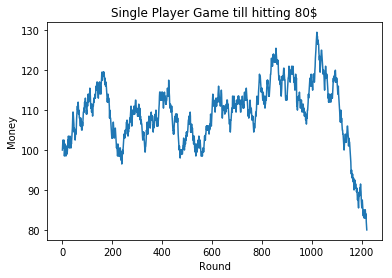

In [6]:
start = time.time()
game = Game(1, 100, 1, 8, "warning")
xlist = [100]
# keep playing as long as money is above 80
while game.players[0].money > 80:
    # keep playing if there is card
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        if game.play_round():
            xlist.append(game.players[0].money)
        else:
            game = Game(1, game.players[0].money, 1, 8, "warning")
    else:
        game = Game(1, game.players[0].money, 1, 8, "warning")
plt.plot(xlist)
plt.title("Single Player Game till hitting 80$")
plt.xlabel("Round")
plt.ylabel("Money")
end = time.time()
print("Elapsed time in seconds: {}".format(int(end-start)))

Text(0,0.5,'Money')

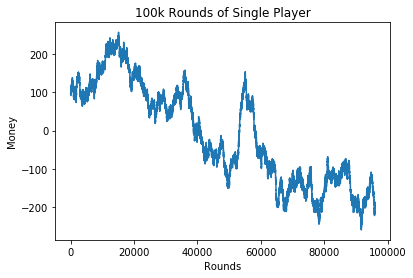

In [7]:
game = Game(1, 100, 1, 8, "warning")
xlist = list()
i = 0
while i < 1e5:
    if game.index < game.cut_card and game.index < game.deck_length:
        i += 1
        game.round += 1
        # print("i:{}\tround:{}".format(i, game.round))
        if game.play_round():
            xlist.append(game.players[0].money)
        else:
            game = Game(1, game.players[0].money, 1, 8, "warning")
    else:
        game = Game(1, game.players[0].money, 1, 8, "warning")
plt.plot(xlist)
plt.title("100k Rounds of Single Player")
plt.xlabel("Rounds")
plt.ylabel("Money")

Elapsed time: 375 seconds


Text(0,0.5,'Money')

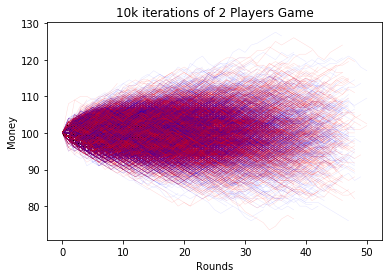

In [8]:
start = time.time()
game = Game(2, 100, 1, 8, "warning")
m1 = [100]
m2 = [100]
round_ = 0
last_m1 = list()
last_m2 = list()
while round_ < int(1e5):
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        round_ += 1
        if game.play_round():
            m1.append(game.players[0].money)
            m2.append(game.players[1].money)
        else:
            plt.plot(m1, 'b-', alpha=0.10, linewidth=0.5)
            plt.plot(m2, 'r-', alpha=0.15, linewidth=0.5)
            last_m1.append(m1[-1])
            last_m2.append(m2[-1])
            game = Game(2, 100, 1, 8, "warning")
            m1 = [100]
            m2 = [100]
    else:
        plt.plot(m1, 'b-', alpha=0.10, linewidth=0.5)
        plt.plot(m2, 'r-', alpha=0.15, linewidth=0.5)
        last_m1.append(m1[-1])
        last_m2.append(m2[-1])
        game = Game(2, 100, 1, 8, "warning")
        m1 = [100]
        m2 = [100]
end = time.time()
print("Elapsed time: {} seconds".format(int(end-start)))
plt.title("10k iterations of 2 Players Game")
plt.xlabel("Rounds")
plt.ylabel("Money")